## 규제선형모델이란? (Regulation linear model)

최적 모델을 위한 cost함수 구성요소는 두가지다
1. 학습데이터 잔차 오류 최소화(min(RSS))
2. 회귀계수 크기 제어($\alpha * ||W||^2_2$)


Cost function goal = $min(RSS(W)) + \alpha * ||W||^2_2$ <br>
그래서 위에 공식에서 알파값이 0과 같이 작아지면 RSS를 최소화 하는 효과가 있고, 알파값이 무한대로 커지면 W를 0에 가깝게 최소화하게 된다. 알파값을 조정해 나가는 과정을 Regulation이라고 한다. 

Regulation에는 L1과 L2가 있다.<br>
L1 regulation : $\alpha * ||W||_1$과 같이 W의 절대값에 대해 페널티를 부여. 영향력이 크지 않은 회귀 계수 값을 0으로 변환<br>
L2 regulation : $\alpha * ||W||^2_2$과 같이 W의 제곱에 대해 페널티를 부여.

### Ridge <br>
Ridge 같은 경우에는 L2를 사용한다.

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# boston 데이터 세트
boston = load_boston()

# to dataframe
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)

# target = price
bostondf['PRICE'] = boston.target
print(bostondf.shape)
bostondf.info()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [3]:
y_target = bostondf['PRICE']
X_data = bostondf.drop(['PRICE'], axis=1, inplace=False)

# alpha=10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(np.round(neg_mse_scores, 3), np.round(rmse_scores, 3), avg_rmse)

[-11.422 -24.294 -28.144 -74.599 -28.517] [3.38  4.929 5.305 8.637 5.34 ] 5.518166280868973


In [4]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    #cross_val_scores 이용 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha{0} avg_rmse:{1:.3f}'.format(alpha, avg_rmse))

alpha0 avg_rmse:5.829
alpha0.1 avg_rmse:5.788
alpha1 avg_rmse:5.653
alpha10 avg_rmse:5.518
alpha100 avg_rmse:5.330


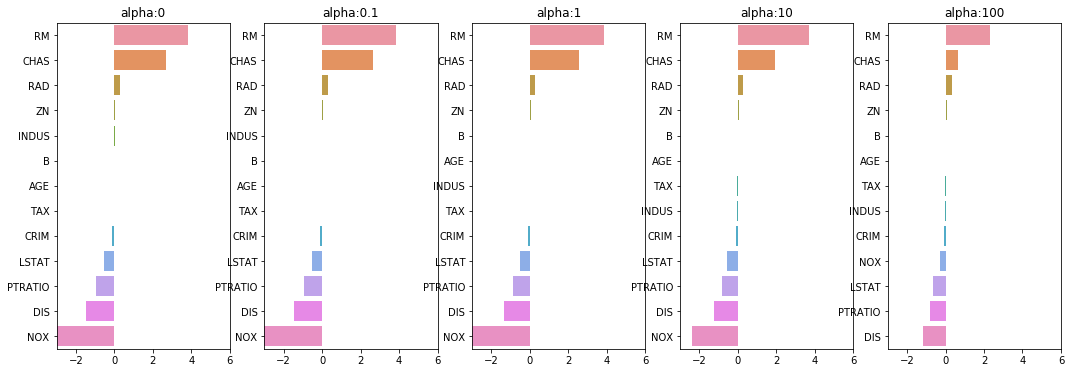

In [8]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 matplotlib 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 dataframe의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax =axs[pos])
    
plt.show()

In [10]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## Lasso <br>
Lasso는 L1 regulation을 사용함. 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거함. L1규제는 적절한 피처만 회귀에 포함시킨다.

In [23]:
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 dataframe으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                        scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha{0}, avg_rmse: {1:.3f}'.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 dataframe
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [18]:
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 추출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha0.07, avg_rmse: 5.612
alpha0.1, avg_rmse: 5.615
alpha0.5, avg_rmse: 5.669
alpha1, avg_rmse: 5.776
alpha3, avg_rmse: 6.189


In [20]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 dataframe 만들기
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## ElasticNet <br>
ElasticNet 같은 경우는 L1, L2 regulation을 모두 사용하는 방법이다. <br>
그래서 파라미터가 하나 더 추가됐다. l1_ratio인데 이 비율은 a / (a + b) 이다. 여기서 a는 l1, b는 l2를 나타낸다. 그래서 l1_ratio가 0이면 l2만 사용하는 것이고, l1_ratio가 1이면 l1만 사용하는 것이라고 보면 된다.

In [24]:
# l1_ratio는 0.7로 고정하고 alpha값의 변화를 살펴보자
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha0.07, avg_rmse: 5.542
alpha0.1, avg_rmse: 5.526
alpha0.5, avg_rmse: 5.467
alpha1, avg_rmse: 5.597
alpha3, avg_rmse: 6.068


In [25]:
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


#### 이와 못지 않게 먼저 데이터의 분포도의 정규화와 인코딩 방법또한 매우 중요하다.

In [28]:
# method는 표준 정규 분포 변환(standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                        include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [31]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None,None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                   input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha0.1, avg_rmse: 5.788
alpha1, avg_rmse: 5.653
alpha10, avg_rmse: 5.518
alpha100, avg_rmse: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha0.1, avg_rmse: 5.826
alpha1, avg_rmse: 5.803
alpha10, avg_rmse: 5.637
alpha100, avg_rmse: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha0.1, avg_rmse: 8.827
alpha1, avg_rmse: 6.871
alpha10, avg_rmse: 5.485
alpha100, avg_rmse: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha0.1, avg_rmse: 5.764
alpha1, avg_rmse: 5.465
alpha10, avg_rmse: 5.754
alpha100, avg_rmse: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha0.1, avg_rmse: 5.298
alpha1, avg_rmse: 4.323
alpha10, avg_rmse: 5.185
alpha100, avg_rmse: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha0.1, avg_rmse: 4.770
alpha1, avg_rmse: 4.676
alpha10, avg_rmse: 4.836
alpha100, avg_rmse: 6.241
